# **Tesis - Algoritmos de Aprendizaje Automático**

## **Introducción:**

**Problema:**
No saber qué canciones van a llegar a ser tendencia. Es decir, se va a crear un modelo que prediga el éxito de una canción. Desde este punto, el objetivo es llegar a saber si una canción puede llegar a ser tendencia comparándolo con los aspectos (popularidad, bailable, enérgico, acústica, instrumental, vivacidad, discurso, entre otros) de las canciones que en ese instante están en auge.

**Importancia:**
Esta problemática es importante porque aborda cómo predecir qué canciones podrían ser tendencia, algo crucial para la industria musical. Este conocimiento ayuda a optimizar estrategias de mercado, tomar decisiones basadas en datos, personalizar la experiencia en plataformas de streaming y fomentar la innovación musical. Además, entender qué hace popular a una canción puede influir en la creación de música y en la interacción cultural entre artistas y audiencias.

**¿Qué se va a realizar?:**
En este archivo se va a predecir la popularidad de una canción en función de varias características musicales. El conjunto de datos incluye 15 características diferentes para cada canción. El proceso de análisis implica la exploración de datos, el preprocesamiento (incluida la eliminación de valores atípicos y el escalado de características) y la implementación de dos modelos de aprendizaje automático diferentes: ElasticNet (un modelo de regresión lineal regularizado) y K-Nearest Neighbors (KNN). El código realiza una optimización de hiperparámetros para ambos modelos utilizando GridSearchCV, analiza las curvas de aprendizaje para comprender el rendimiento del modelo y concluye con una prueba de hipótesis estadística (prueba de Wilcoxon) para comparar el rendimiento entre los dos modelos, con todos los resultados visualizados a través de varios gráficos y métricas que incluyen RMSE (Root Mean Square Error) y puntuaciones R².

**Dataset:**
El dataset está público en Kaggle, y fue recopilado de Spotify mediante su API. Como tal, este dataset contiene las siguientes características.

***Entradas (15 características de la canción/audio):***

1.	**Nombre de la canción (song_name):** El nombre de la canción tal cual.
2.	**Popularidad de la canción (song_popularity):** Porcentaje de likes que tiene la canción en Spotify.
3.	**Duración de la canción (duration_ms):** Cuánto dura la canción en milisegundos.
4.	**Bailable (danceability):** La bailabilidad describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales, como el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0.0 es el menos bailable y 1.0 el más bailable.
5.	**Enérgico (energy):** La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Normalmente, las pistas energéticas se perciben rápidas, fuertes y ruidosas. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, la sonoridad percibida, el timbre, la velocidad de inicio y la entropía general.
6.	**Acústica (acousticness):** Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una confianza alta de que la pista es acústica.
7.	**Instrumental (instrumentalness):** Predice si una pista no contiene voces. Los sonidos "ooh" y "aah" se consideran instrumentales en este contexto. Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor será la probabilidad de que la pista no contenga voces.
8.	**Vivacidad (liveness):** Detecta la presencia de público en la grabación. Los valores de Liveness más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo.
9.	**Sonoridad (loudness):** La sonoridad general de una pista en decibeles (dB). La sonoridad es la calidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.
10.	**Clave (key):** La tonalidad en la que se encuentra la pista. Los números enteros se asignan a tonos utilizando la notación de clase de tono estándar. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detectó ninguna tonalidad, el valor es -1.
11.	**Discurso (speechiness):** Speechiness detecta la presencia de palabras habladas en una pista. Cuanto más parecida a una voz sea la grabación, más cerca estará de 1.0 el valor del atributo.
12.	**Modalidad (mode):** El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor se representa con 1 y menor con 0.
13.	**Tempo (tempo):** LEl tempo general estimado de una pista en pulsaciones por minuto (PPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de las pulsaciones.
14.	**Compás (time_signature):** Un compás estimado. El compás (metro) es una convención de notación para especificar cuántos pulsos hay en cada compás (o medida). El compás varía de 3 a 7, lo que indica compases de "3/4" a "7/4".
15.	**Valencia del audio (audio_valence):** Ruido de la grabación del audio. Si la canción tiene más ruido, se acerca a 1.00.


## ***Parte 1:***

## **Exploración del DataSet**


Bibliotecas importadas:

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import files
import math
from sklearn.manifold import TSNE


# Stats and Machine Learning libraries
from scipy.stats import wilcoxon
from statsmodels.formula import api
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sklearn imports
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RepeatedKFold,
    learning_curve,
    cross_val_score
)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (
    RFE,
    VarianceThreshold,
    SelectKBest,
    f_regression
)
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    make_scorer
)
from sklearn.linear_model import (
    ElasticNet,
    LinearRegression
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

# Plot configuration
plt.rcParams['figure.figsize'] = [10,6]

# Warnings configuration
import warnings
warnings.filterwarnings('ignore')

En esta parte se sube el archivo csv:

In [2]:
archivo_subido = files.upload()

Saving song_data.csv to song_data.csv


Se muestra los datos que contiene el archivo:

In [3]:
df = pd.read_csv('song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


Se realiza el siguiente comando para saber qué tipo de datos se tienen en el dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Se elimina la columna del nombre de la canción porque solo se va a trabajar con datos numéricos:

In [5]:
#Importing the dataset

df.drop(['song_name'], axis=1, inplace=True)
display(df.head())

target = 'song_popularity'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574



Inference: The Datset consists of 14 features & 18835 samples.


Se realizó lo siguiente para saber qué datos son numéricos y qué datos son categóricos:

In [6]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 10 numerical & 3 categorical features.


Se realiza lo siguiente, para conocer los valores estadísticos de cada variable y comprender si las gráficas a obtener, tienen sentido:

In [7]:
#Checking the stats of all the columns

display(df.describe())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


## **Análisis del DataSet**

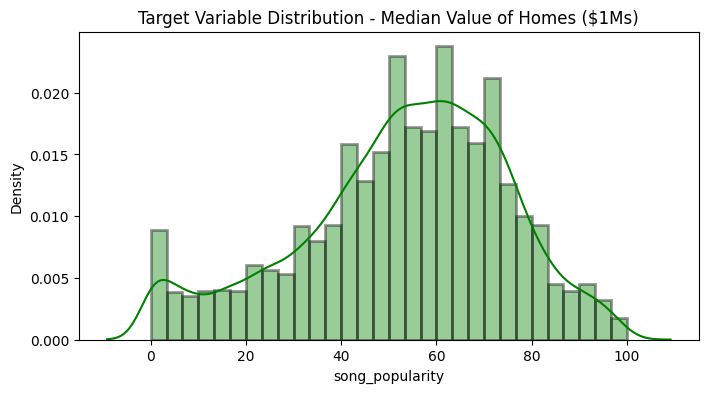

In [9]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()
# PROMPT. Genera gráfica de la variable objetivo (histograma).

**Análisis:** La variable objetivo parece tener una distribución normal, con un promedio de alrededor de 60 unidades.

In [10]:
pip install pandas numpy matplotlib seaborn


Dataset Information:
Total number of features: 14
Number of numerical features: 11
Number of categorical features: 3

Categorical Features:
- key: 12 unique values
- audio_mode: 2 unique values
- time_signature: 5 unique values
                                 
Visualising Categorical Features:                                 


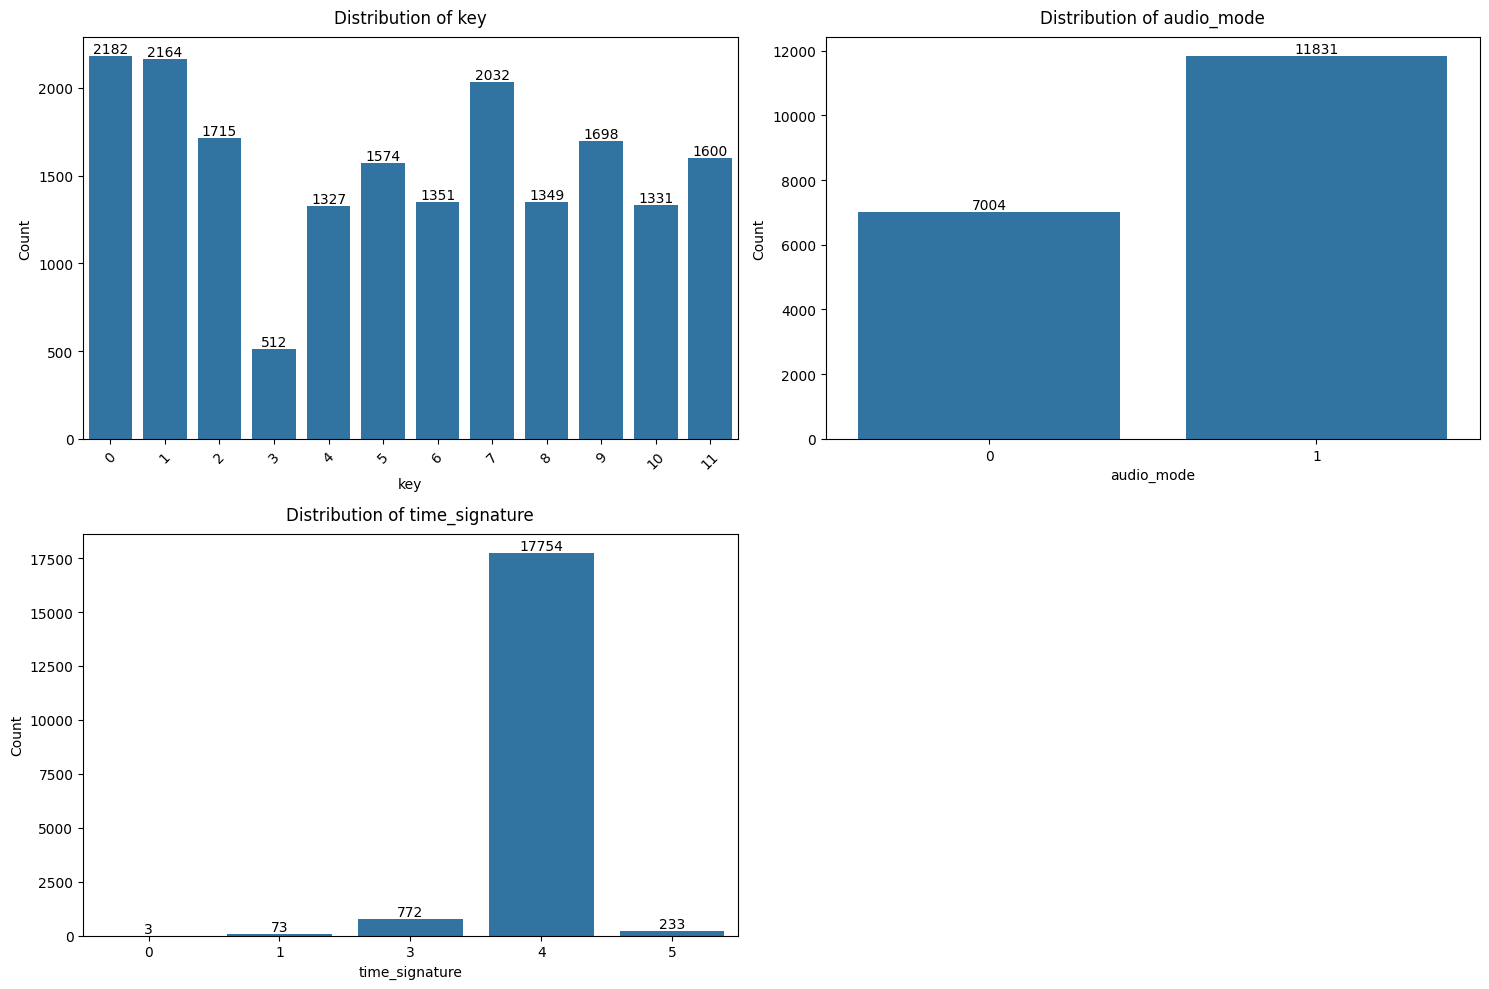


Summary Statistics for Categorical Features:
--------------------------------------------------

Feature: key
     Count  Percentage
key                   
0     2182       11.58
1     2164       11.49
7     2032       10.79
2     1715        9.11
9     1698        9.02
11    1600        8.49
5     1574        8.36
6     1351        7.17
8     1349        7.16
10    1331        7.07
4     1327        7.05
3      512        2.72
--------------------------------------------------

Feature: audio_mode
            Count  Percentage
audio_mode                   
1           11831       62.81
0            7004       37.19
--------------------------------------------------

Feature: time_signature
                Count  Percentage
time_signature                   
4               17754       94.26
3                 772        4.10
5                 233        1.24
1                  73        0.39
0                   3        0.02
--------------------------------------------------


In [11]:
# First, identify numerical and categorical features
def identify_feature_types(df, threshold=15):
    """
    Identify numerical and categorical features in the dataset
    threshold: maximum number of unique values for categorical features
    """
    numerical_features = []
    categorical_features = []

    for column in df.columns:
        if df[column].nunique() < threshold:
            categorical_features.append(column)
        else:
            numerical_features.append(column)

    return numerical_features, categorical_features

# Get feature types
numerical_features, categorical_features = identify_feature_types(df)

# Print information about the features
print("\nDataset Information:")
print(f"Total number of features: {len(df.columns)}")
print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")

print("\nCategorical Features:")
for feature in categorical_features:
    print(f"- {feature}: {df[feature].nunique()} unique values")

# Create visualization for categorical features
print('\nVisualising Categorical Features:'.center(100))

# Set up the subplot grid
n_cols = 2
n_rows = math.ceil(len(categorical_features)/n_cols)

# Create figure with appropriate size
plt.figure(figsize=(15, 5*n_rows))

# Plot each categorical feature
for i, feature in enumerate(categorical_features, 1):
    # Create subplot
    plt.subplot(n_rows, n_cols, i)

    # Create countplot
    sns.countplot(data=df, x=feature)

    # Customize plot
    plt.title(f'Distribution of {feature}', pad=10)
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Rotate x-axis labels if there are many categories
    if df[feature].nunique() > 5:
        plt.xticks(rotation=45)

    # Add value labels on top of bars
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics for categorical features
print("\nSummary Statistics for Categorical Features:")
print("-" * 50)
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    value_counts = df[feature].value_counts()
    total = len(df)

    summary_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': (value_counts / total * 100).round(2)
    })
    print(summary_df)
    print("-" * 50)

    # PROMPT. Genera gráficas para conocer la distribución de los datos categóricos.

**Análisis:** La imagen muestra tres gráficos de barras que muestran distribuciones de características musicales: clave, modo de audio y compás. La distribución de claves está relativamente equilibrada entre los valores 0-11, con las claves 0 y 1 con los recuentos más altos (entre 2100-2200) y la clave 3 con los más bajos (entre 500). El modo de audio muestra una distribución binaria con el modo 1 (11.831 recuentos) siendo más frecuente que el modo 0 (7.004 recuentos). La distribución de compás está muy sesgada hacia el valor 4 (17.754 recuentos), con otros valores (0, 1, 3 y 5) con frecuencias significativamente más bajas, lo que sugiere que el compás 4/4 es predominante en este conjunto de datos.

Lo siguiente que se va a realizar, es observar la distribución de los valores numéricos:

                                 Numeric Features Distribution                                  


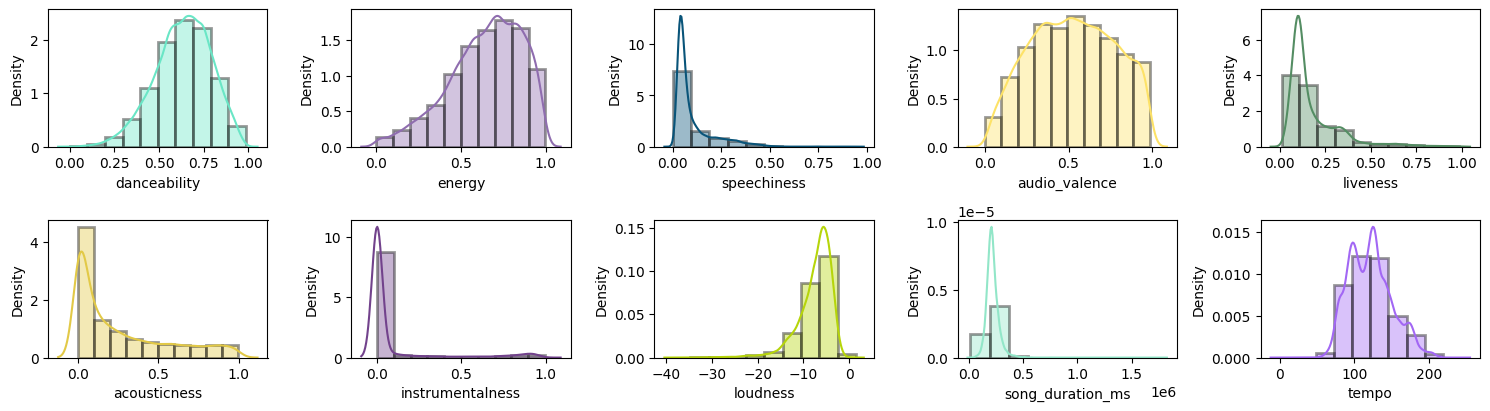

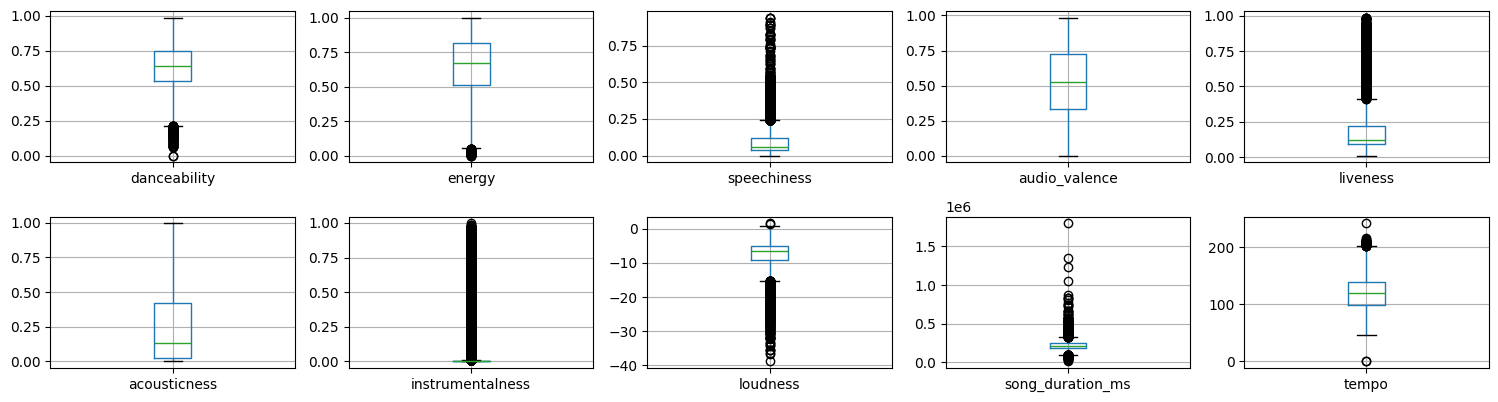

In [12]:
#Visualising the numeric features

print('\033[1mNumeric Features Distribution'.center(100))

n=5

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

# PROMPT. Genera gráficas para visualizar los datos numéricos.

**Análisis:** Como se puede observar existen outliers por lo que se deben eliminar los mismos, ya que los outliers crean sesgos. Como tal, observando estos gráficos, se puede destacar que las características musicales analizadas revelan que la mayoría de las canciones son moderadamente bailables y enérgicas, con un bajo nivel de locución, una valencia emocional equilibrada y una baja vivacidad (indicativo de grabaciones de estudio). La acústica y la instrumentalidad están muy sesgadas, lo que demuestra que la mayoría de las pistas son electrónicas con voces, mientras que la sonoridad sigue una distribución normal de alrededor de -10 a -5 dB. Las duraciones de las canciones suelen ser de 3 a 5 minutos y los tempos se agrupan alrededor de 100 a 120 BPM. La densidad y los diagramas de caja confirman las tendencias centrales y revelan valores atípicos significativos en locución, duración, tempo, vivacidad e instrumentalidad

## **Limpieza del DataSet**

Para remover duplicados (buena práctica):

In [13]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 3911


Esto se realiza para ver si existen elementos vacíos, como todo es cero, todo está bien:

In [14]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


**Análsis:** El conjunto de datos no tiene valores inconsistentes.

Convertir datos categóricos a números:

In [15]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape

# PROMPT. Convertir datos categóricos a numéricos.

One-Hot Encoding on features:
audio_mode

Dummy Encoding on features:
time_signature
key


(14924, 27)

**Explicación:** La codificación *one-hot* transforma las características categóricas en vectores binarios, creando una columna separada para cada categoría, con un `1` indicando la presencia de la categoría (p. ej., `audio_mode` con `"major"` y `"minor"` se convierte en dos columnas). La codificación *dummy* es similar, pero omite una categoría para evitar redundancia y multicolinealidad, tratando la categoría omitida como una referencia (p. ej., `time_signature` y `key` dan como resultado menos columnas que sus categorías únicas). La forma del conjunto de datos `(14924, 27)` indica 14,924 muestras y 27 características después de aplicar estas codificaciones y posiblemente incluir otras características numéricas.

En esta parte, se eliminan los outliers, es decir, datos que son atípicos y crean sesgos.

In [16]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

# PROMPT. Remover los outliers del dataset.

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,True,0.0294,...,False,False,False,False,False,False,True,False,False,False
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,False,0.0498,...,False,True,False,False,False,False,False,False,False,False
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,True,0.1070,...,False,False,False,False,False,False,False,False,False,False
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,True,0.0313,...,False,False,False,False,False,False,False,False,True,False
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,False,0.1240,...,False,False,True,False,False,False,False,False,False,False



Inference:
Before removal of outliers, The dataset had 14924 samples.
After removal of outliers, The dataset now has 8950 samples.


Los datos ahora SÍ están balanceados:

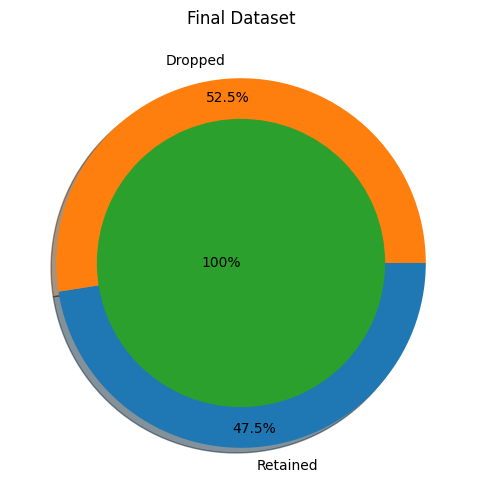


Inference: After the cleanup process, 9885 samples were dropped, while retaining 52.48% of the data.


In [17]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

Última revisión para saber si todo el dataset está correcto:

In [18]:
valores_faltantes = df.isnull().any()
# Comprobar si todas las columnas tienen valores faltantes (True) o no (False)
todas_las_columnas_tienen_valores_faltantes = valores_faltantes.all()
print("Valores faltantes por columna:")
print(valores_faltantes)
print("\n¿Todas las columnas tienen valores faltantes?", todas_las_columnas_tienen_valores_faltantes)

Valores faltantes por columna:
song_popularity     False
song_duration_ms    False
acousticness        False
danceability        False
energy              False
instrumentalness    False
liveness            False
loudness            False
audio_mode          False
speechiness         False
tempo               False
audio_valence       False
time_signature_1    False
time_signature_3    False
time_signature_4    False
time_signature_5    False
key_1               False
key_2               False
key_3               False
key_4               False
key_5               False
key_6               False
key_7               False
key_8               False
key_9               False
key_10              False
key_11              False
dtype: bool

¿Todas las columnas tienen valores faltantes? False


## **Manipulación de los datos**

Se divide en training y testing:

In [19]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (8950, 26) (8950,) 
Training set  --->  (7160, 26) (7160,) 
Testing set   --->  (1790, 26)  (1790,)


**Información del train dataset:**

In [20]:
Train_X.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,210349,0.0101,0.484,0.748,0.000239,0.242,-5.049,True,0.0491,100.568,...,False,False,False,False,False,False,False,False,False,False
1,117577,0.5730,0.863,0.390,0.014200,0.224,-9.988,True,0.2000,75.816,...,False,False,False,False,False,False,True,False,False,False
2,246240,0.0316,0.774,0.739,0.000006,0.119,-4.022,True,0.0952,126.002,...,False,False,False,False,False,False,False,False,False,False
3,220973,0.1600,0.751,0.574,0.000131,0.110,-8.071,True,0.1720,157.098,...,False,False,False,False,False,False,False,False,False,False
4,214960,0.1480,0.472,0.900,0.000297,0.340,-6.406,False,0.0582,95.826,...,False,False,False,False,False,False,True,False,False,False


In [21]:
Train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  7160 non-null   int64  
 1   acousticness      7160 non-null   float64
 2   danceability      7160 non-null   float64
 3   energy            7160 non-null   float64
 4   instrumentalness  7160 non-null   float64
 5   liveness          7160 non-null   float64
 6   loudness          7160 non-null   float64
 7   audio_mode        7160 non-null   bool   
 8   speechiness       7160 non-null   float64
 9   tempo             7160 non-null   float64
 10  audio_valence     7160 non-null   float64
 11  time_signature_1  7160 non-null   bool   
 12  time_signature_3  7160 non-null   bool   
 13  time_signature_4  7160 non-null   bool   
 14  time_signature_5  7160 non-null   bool   
 15  key_1             7160 non-null   bool   
 16  key_2             7160 non-null   bool   


**Exportación del Dataset de Entrenamiento:**

La siguiente celda genera el archivo AlgPropio.csv que contiene únicamente las características seleccionadas del dataset de entrenamiento. Este archivo será utilizado como entrada para el algoritmo estadístico propio, incluyendo las 13 variables más relevantes para el análisis: duración de la canción, acústica, bailabilidad, energía, instrumentalidad, vivacidad, volumen, modo de audio, vocalización, tempo, valencia de audio, firma de tiempo y tonalidad.

In [22]:
# Seleccionar solo las columnas especificadas
columnas_seleccionadas = [
    'song_duration_ms', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'audio_mode',
    'speechiness', 'tempo', 'audio_valence', 'time_signature_1', 'key_1'
]

# Crear el DataFrame con solo las columnas seleccionadas
Training_df = Train_X[columnas_seleccionadas]

# Generar el archivo CSV
Training_df.to_csv('AlgPropio.csv', index=False)

print(f'\033[1m✓ Archivo "AlgPropio.csv" generado exitosamente')
print(f'Dimensiones: {Training_df.shape[0]} filas × {Training_df.shape[1]} columnas')
print(f'\nColumnas incluidas:')
for i, col in enumerate(columnas_seleccionadas, 1):
    print(f'  {i}. {col}')

✓ Archivo "AlgPropio.csv" generado exitosamente
Dimensiones: 7160 filas × 13 columnas

Columnas incluidas:
  1. song_duration_ms
  2. acousticness
  3. danceability
  4. energy
  5. instrumentalness
  6. liveness
  7. loudness
  8. audio_mode
  9. speechiness
  10. tempo
  11. audio_valence
  12. time_signature_1
  13. key_1


## **Visualización de los datos con TNSE**

Unique labels in y_combined: [  0  47  26  40  69  53  72  71   7  48  51  39  67  15  54  66  64  59
  18  70  56  62  77  58  83  24  55  22  61  33  38  98  12  46   1   6
  32  87  65  16  45  19  42  29  68  20  63  78  41  36   3  50  13  21
  84  35  44  81  57  52  37  27  25  43  92  60  11  49   4  73  79  34
  75  74  17  28  30  14  90   2  82  86  76  94   5  85  80  31   9  23
   8  10  91  96  89  88  93  97 100  95]
Class distribution:
 song_popularity
52     211
55     205
58     201
62     197
63     196
      ... 
95       5
97       4
98       3
96       3
100      1
Name: count, Length: 100, dtype: int64
Applying t-SNE for dimensionality reduction...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.002s...
[t-SNE] Computed neighbors for 8950 samples in 1.489s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for 

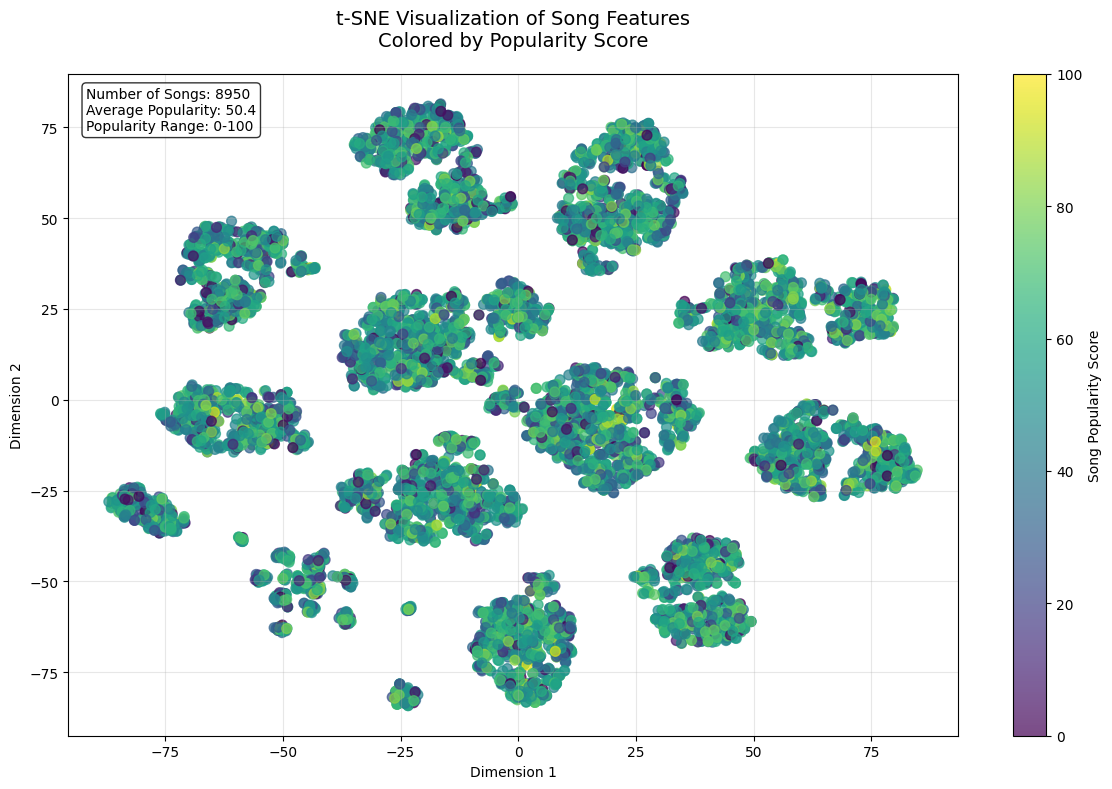


Summary Statistics for Song Popularity:
count    8950.000000
mean       50.415084
std        20.630667
min         0.000000
25%        39.000000
50%        54.000000
75%        65.000000
max       100.000000
Name: song_popularity, dtype: float64


<Figure size 1000x600 with 0 Axes>

In [23]:
# Standardization
std = StandardScaler()
Train_X_std = std.fit_transform(Train_X)
Test_X_std = std.transform(Test_X)

# Combine training and testing data for visualization
X_combined_std = pd.DataFrame(Train_X_std, columns=Train_X.columns)
X_combined_std = pd.concat([X_combined_std, pd.DataFrame(Test_X_std, columns=Test_X.columns)], ignore_index=True)
y_combined = pd.concat([Train_Y, Test_Y]).reset_index(drop=True)

# Verify the labels
print("Unique labels in y_combined:", y_combined.unique())
print("Class distribution:\n", y_combined.value_counts())

# Apply t-SNE
print("Applying t-SNE for dimensionality reduction...")
tsne_model = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1000,
    verbose=1
)
X_tsne = tsne_model.fit_transform(X_combined_std)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Song Popularity'] = y_combined

# Create the visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    tsne_df['Dimension 1'],
    tsne_df['Dimension 2'],
    c=tsne_df['Song Popularity'],
    cmap='viridis',
    alpha=0.7,
    s=50  # Point size
)

# Add colorbar and labels
colorbar = plt.colorbar(scatter)
colorbar.set_label('Song Popularity Score', size=10)

# Customize the plot
plt.title('t-SNE Visualization of Song Features\nColored by Popularity Score', size=14, pad=20)
plt.xlabel('Dimension 1', size=10)
plt.ylabel('Dimension 2', size=10)
plt.grid(True, alpha=0.3)

# Add text with summary statistics
stats_text = f'Number of Songs: {len(tsne_df)}\n'
stats_text += f'Average Popularity: {y_combined.mean():.1f}\n'
stats_text += f'Popularity Range: {y_combined.min():.0f}-{y_combined.max():.0f}'

plt.text(0.02, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout and display
plt.tight_layout()
plt.show()

# Optional: Print some additional statistics
print("\nSummary Statistics for Song Popularity:")
print(y_combined.describe())

# Optional: Save the visualization
plt.savefig('song_popularity_tsne.png', dpi=300, bbox_inches='tight')

# PROMPT. Genera una gráfica de TSNE para visualizar el espacio de las características en 2 dimensiones. Usar el label como color del punto en la visualización.

**Análisis:** La visualización t-SNE revela grupos distintos de canciones en el conjunto de datos (n=8950), con puntuaciones de popularidad distribuidas en diferentes regiones. El gradiente de color, que va del violeta (baja popularidad ~0) al amarillo (alta popularidad ~100), muestra que la popularidad de las canciones está bastante distribuida entre los grupos en lugar de concentrarse en regiones específicas. Esto sugiere que la popularidad de las canciones (media=50,4, desviación estándar=20,6) no está fuertemente ligada a las características musicales que forman estos grupos. Curiosamente, hay grupos bien definidos tanto en el centro como en la periferia del gráfico, lo que indica agrupaciones musicales claras, pero la mezcla similar de colores (predominantemente verde-azul) dentro de cada grupo sugiere que tipos similares de canciones pueden alcanzar distintos niveles de popularidad. Esto implica que la popularidad podría estar influenciada por factores más allá de las características musicales puras capturadas en las dimensiones t-SNE.

Se realiza la normalización de testing y training:

In [24]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,...,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03
mean,-2.143537e-16,-9.551639e-17,-4.381349e-16,-1.359558e-16,-2.480945e-18,-8.782546e-17,-9.824543e-17,1.984756e-17,1.081692e-16,-1.429024e-16,...,-5.656555e-17,-1.587805e-17,-9.824543e-17,-2.927515e-17,-1.389329e-17,7.591693e-17,4.465702e-17,5.185176e-17,-7.939025e-17,-2.431326e-17
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,...,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.625387e+00,-9.181177e-01,-2.918774e+00,-3.131156e+00,-3.425841e-01,-1.575563e+00,-2.825473e+00,-1.348254e+00,-9.812680e-01,-2.528553e+00,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
25%,-6.702830e-01,-8.223387e-01,-6.452384e-01,-6.864460e-01,-3.425841e-01,-6.881147e-01,-5.876500e-01,-1.348254e+00,-6.975836e-01,-7.615380e-01,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
50%,-6.177447e-02,-4.150227e-01,5.798743e-02,1.271097e-01,-3.411082e-01,-3.751120e-01,1.864114e-01,7.417001e-01,-4.002151e-01,-1.426259e-02,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
75%,6.146981e-01,5.921024e-01,7.219555e-01,8.042306e-01,-2.673929e-01,4.767485e-01,7.447833e-01,7.417001e-01,2.966273e-01,6.418977e-01,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
max,2.716562e+00,2.672887e+00,2.386143e+00,1.703690e+00,6.650948e+00,2.864200e+00,2.376364e+00,7.417001e-01,3.368207e+00,2.773299e+00,...,3.109765e+00,5.899152e+00,3.607179e+00,3.253577e+00,3.569706e+00,2.774865e+00,3.540476e+00,3.086975e+00,3.743058e+00,3.361905e+00



                                          Standardardization on Testing set                                          


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,...,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,0.036125,-0.014032,0.006938,0.028758,0.010602,-0.058353,0.026948,0.009632,-0.023773,-0.005688,...,-0.012939,0.006781,-0.001628,0.024867,-0.058608,-0.015326,0.025095,0.036205,-0.022964,-0.003066
std,0.971755,0.975985,0.990170,0.974326,1.002490,0.982153,0.979911,0.997307,0.968979,1.002542,...,0.981985,1.019502,0.997564,1.035975,0.896783,0.981478,1.040064,1.048494,0.959254,0.995564
min,-2.491247,-0.918115,-2.932429,-2.934083,-0.342584,-1.543058,-2.781757,-1.348254,-0.972847,-2.236695,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
25%,-0.613785,-0.815321,-0.624756,-0.610649,-0.342584,-0.734631,-0.562450,-1.348254,-0.703373,-0.755222,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
50%,-0.024516,-0.425960,0.064815,0.149849,-0.341076,-0.425551,0.223624,0.741700,-0.412847,-0.021330,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
75%,0.611647,0.586634,0.733904,0.809284,-0.262995,0.373068,0.727351,0.741700,0.323469,0.580851,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
max,2.685640,2.669241,2.345178,1.693583,6.608043,2.852991,2.786427,0.741700,3.368207,2.675691,...,3.109765,5.899152,3.607179,3.253577,3.569706,2.774865,3.540476,3.086975,3.743058,3.361905


Se realiza en esta parte Feature Selection/Extracción para obervar la matriz de correlación:

                                       Correlation Matrix                                       


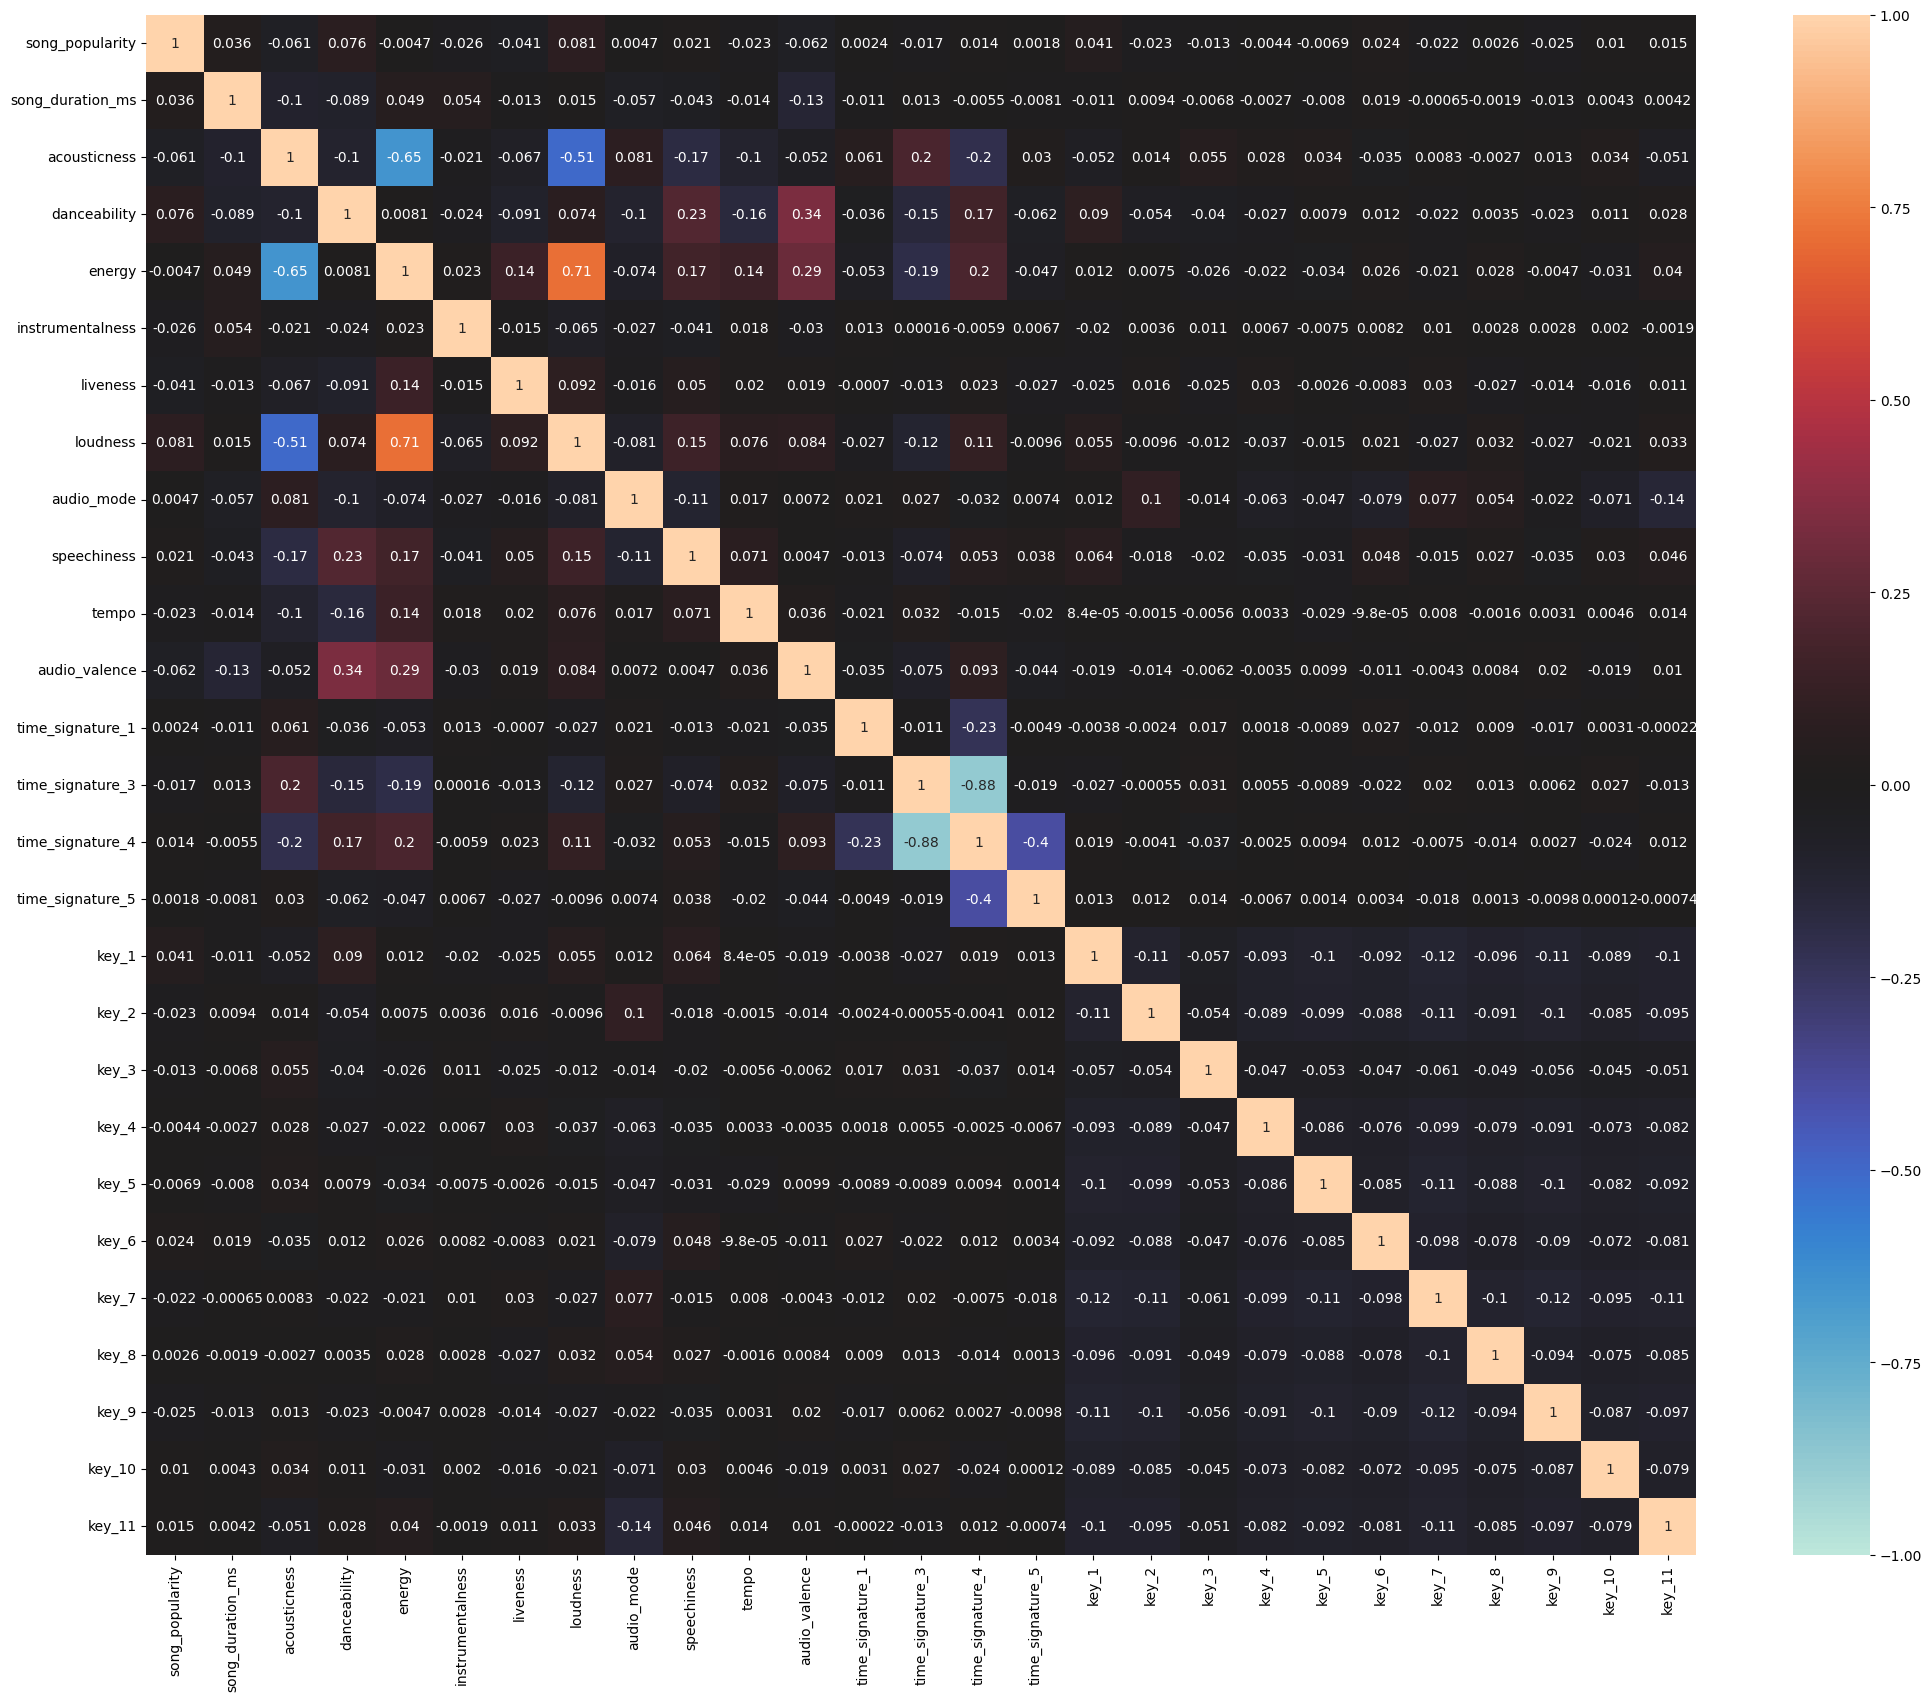

In [25]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

**Análisis:** Al observar la matriz de correlación, surgen varias ideas clave: primero, existen fuertes correlaciones entre la energía y el volumen (0,71), lo que indica que estas características tienden a aumentar juntas en las canciones. En particular, la popularidad de la canción (nuestra variable objetivo) muestra correlaciones relativamente débiles con la mayoría de las características, siendo las más fuertes con la capacidad de baile (0,076) y el volumen (0,081), lo que sugiere que predecir la popularidad de la canción puede ser un desafío ya que ninguna característica individual tiene una fuerte relación directa con ella. También hay algunas correlaciones negativas moderadas interesantes, como entre la acústica y la energía (-0,65), lo que tiene sentido intuitivo ya que las canciones acústicas tienden a tener niveles de energía más bajos. Las variables de compás muestran algunas correlaciones fuertes entre sí (en particular, compás_3 y compás_4 con -0,88), lo que indica una posible redundancia en estas características. Las variables clave (clave_1 a clave_11) generalmente muestran correlaciones débiles con otras características y entre ellas mismas, lo que sugiere que podrían no ser fuertes predictores de la popularidad de la canción de forma aislada.

## ***Parte 2:***

## **Análisis de modelos**

### **1) Regresión Lineal**

Como método de feature selection, vamos a usar Variance Threshold.

RMSE (Train): 20.4954886303477 R-squared (Train): 0.01734236050556548 MSE (Train): 420.0650541967119
RMSE (Test): 20.378240621122014 R-squared (Test): 0.005795868456602182 MSE (Test): 415.27269081234726
Predicciones en el conjunto de test: [51.9047228  49.18131308 50.74174007 ... 53.1213925  49.2442611
 51.3812999 ]


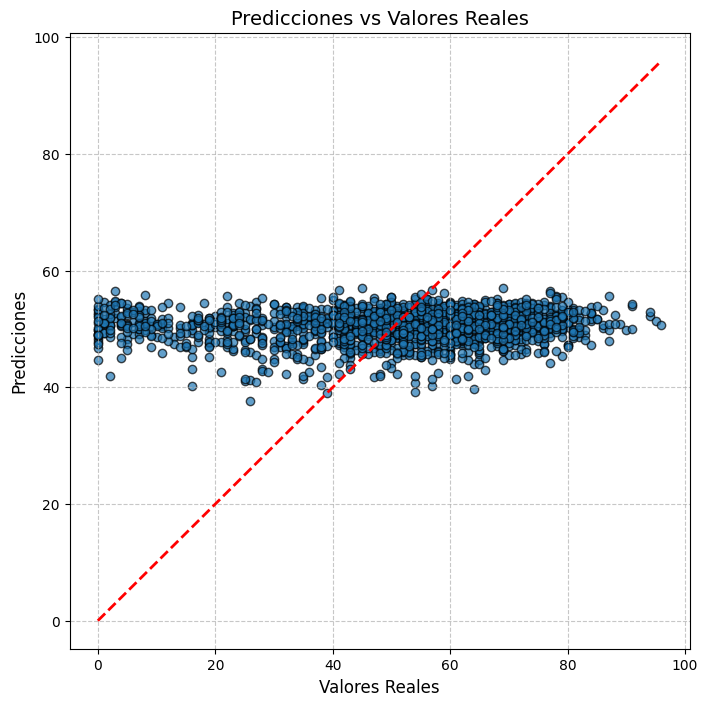

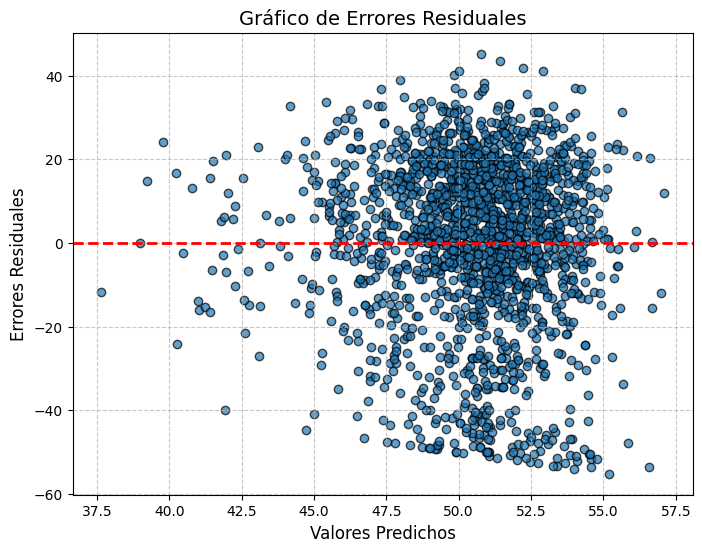

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Definir función para calcular métricas de regresión
def calculate_regression_metrics(model, X, y_true):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Calcular RMSE manualmente con raíz cuadrada
    r2 = r2_score(y_true, y_pred)  # Coeficiente de determinación

    return rmse, r2, mse


# Configuración de los hiperparámetros
degree = 2
alpha = 0.0001  # Regularización para ElasticNet
l1_ratio = 0.9  # Proporción L1 para ElasticNet
threshold = 0.1


# Pipeline
pipeline = Pipeline([
    #Feature Scaler tipo filter. Elimina caracteristicas cuya varianza no llegue a cierto umbral.
    ('var_thresh', VarianceThreshold(threshold=threshold)),
    # Genera características polinómicas hasta el grado especificado.
    ('poly', PolynomialFeatures(degree=degree)),
    #Escalar datos
    ('scal', StandardScaler()),
    #Regresión lineal regularizada elasticnet.
    ('reg', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42))
])

# Entrenamiento del pipeline
pipeline.fit(Train_X, Train_Y)


# Calcular métricas en el conjunto de entrenamiento
rmse_train, r2_train, mse_train = calculate_regression_metrics(pipeline, Train_X, Train_Y)
print("RMSE (Train):", rmse_train, "R-squared (Train):", r2_train, "MSE (Train):", mse_train)

# Calcular métricas en el conjunto de test
rmse_test, r2_test, mse_test = calculate_regression_metrics(pipeline, Test_X, Test_Y)
print("RMSE (Test):", rmse_test, "R-squared (Test):", r2_test, "MSE (Test):", mse_test)

# Realizar predicciones en el conjunto de test
pred_test = pipeline.predict(Test_X)
print("Predicciones en el conjunto de test:", pred_test)


# Gráfico de predicciones vs valor real
plt.figure(figsize=(8, 8))
plt.scatter(Test_Y, pred_test, alpha=0.7, edgecolor='k')
plt.plot([Test_Y.min(), Test_Y.max()], [Test_Y.min(), Test_Y.max()], 'r--', lw=2)  # Línea ideal (y=x)
plt.xlabel("Valores Reales", fontsize=12)
plt.ylabel("Predicciones", fontsize=12)
plt.title("Predicciones vs Valores Reales", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Calcular residuales
residuals = Test_Y - pred_test

# Gráfico de errores residuales
plt.figure(figsize=(8, 6))
plt.scatter(pred_test, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', lw=2)  # Línea en y=0
plt.xlabel("Valores Predichos", fontsize=12)
plt.ylabel("Errores Residuales", fontsize=12)
plt.title("Gráfico de Errores Residuales", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Análisis:**

***Gráfica 1:*** Según este gráfico de "Predicciones frente a valores reales", el modelo parece tener un rendimiento deficiente. La línea discontinua roja representa la línea de predicción ideal en la que los valores predichos serían iguales a los valores reales, pero los puntos de dispersión azules muestran que el modelo predice constantemente valores entre aproximadamente 40 y 55 independientemente de los valores reales (que varían de 0 a 100). Esto sugiere que el modelo no ha logrado capturar los patrones subyacentes en los datos y, en cambio, está utilizando predicciones predeterminadas cercanas a la media. Esto se ve respaldado además por las métricas de rendimiento deficiente que se muestran en la parte superior: un valor R cuadrado de solo aproximadamente 0,017 para el conjunto de entrenamiento y 0,005 para el conjunto de prueba, junto con valores RMSE relativamente altos de alrededor de 20 para ambos conjuntos. Este modelo necesitaría una mejora significativa, ya que actualmente no proporciona predicciones significativas.

***Gráfica 2:*** Este gráfico de "Errores residuales" confirma aún más el bajo rendimiento del modelo. Los puntos de dispersión muestran la diferencia entre los valores predichos y los reales (residuales) graficados contra los valores predichos. El patrón revela varios problemas preocupantes: primero, hay un patrón heterocedástico claro donde la dispersión de los residuos aumenta significativamente a medida que aumentan los valores predichos, formando una forma similar a un embudo. Los residuos varían de aproximadamente -60 a +40, lo cual es bastante grande considerando la escala de predicciones (37,5 a 57,5). La línea discontinua roja en y=0 representa dónde deberían agruparse idealmente los residuos, pero en cambio, vemos un patrón no aleatorio con desviaciones sistemáticas, lo que sugiere que el modelo no ha logrado capturar relaciones subyacentes importantes en los datos. Esto, combinado con la amplia dispersión de los residuos, indica que las predicciones del modelo son sesgadas y altamente variables.

### **Hiperparámetros**

Epoch 1/100:
Training RMSE: 20.2623
Validation RMSE: 20.8040

Epoch 2/100:
Training RMSE: 20.2483
Validation RMSE: 20.7906

Epoch 3/100:
Training RMSE: 20.2338
Validation RMSE: 20.7780

Epoch 4/100:
Training RMSE: 20.2198
Validation RMSE: 20.7653

Epoch 5/100:
Training RMSE: 20.2060
Validation RMSE: 20.7536

Epoch 6/100:
Training RMSE: 20.1933
Validation RMSE: 20.7436

Epoch 7/100:
Training RMSE: 20.1800
Validation RMSE: 20.7345

Epoch 8/100:
Training RMSE: 20.1664
Validation RMSE: 20.7269

Epoch 9/100:
Training RMSE: 20.1525
Validation RMSE: 20.7198

Epoch 10/100:
Training RMSE: 20.1389
Validation RMSE: 20.7150

Epoch 11/100:
Training RMSE: 20.1262
Validation RMSE: 20.7103

Epoch 12/100:
Training RMSE: 20.1135
Validation RMSE: 20.7071

Epoch 13/100:
Training RMSE: 20.1002
Validation RMSE: 20.7049

Epoch 14/100:
Training RMSE: 20.0864
Validation RMSE: 20.7057

Epoch 15/100:
Training RMSE: 20.0722
Validation RMSE: 20.7076

Epoch 16/100:
Training RMSE: 20.0580
Validation RMSE: 20.7113

E

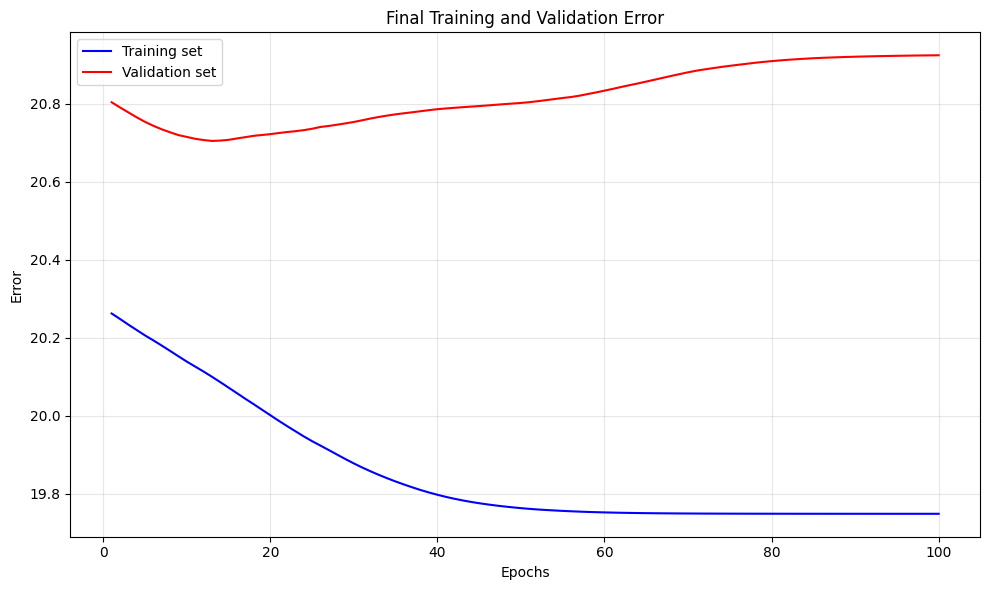


Final Test RMSE: 20.476445628417313


In [27]:
# Define parameters
threshold = 0.001  # Variance threshold for feature selection
degree = 2      # Polynomial degree

def train_with_validation_curve(X, y, n_epochs=100, test_size=0.2, random_state=42):
    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Initialize lists to store errors
    train_errors = []
    val_errors = []

    # Create base pipeline
    pipeline = Pipeline([
        ('var_thresh', VarianceThreshold(threshold=threshold)),
        ('poly', PolynomialFeatures(degree=degree)),
        ('scal', StandardScaler()),
        ('reg', ElasticNet(random_state=42))
    ])

    # Training loop
    for epoch in range(n_epochs):
        # Update alpha based on epoch (decreasing learning rate)
        current_alpha = 1.0 * (0.9 ** epoch)
        pipeline.set_params(reg__alpha=current_alpha)

        # Fit the model
        pipeline.fit(X_train, y_train)

        # Calculate errors
        train_pred = pipeline.predict(X_train)
        val_pred = pipeline.predict(X_val)

        train_error = np.sqrt(mean_squared_error(y_train, train_pred))
        val_error = np.sqrt(mean_squared_error(y_val, val_pred))

        train_errors.append(train_error)
        val_errors.append(val_error)

        print(f"Epoch {epoch + 1}/{n_epochs}:")
        print(f"Training RMSE: {train_error:.4f}")
        print(f"Validation RMSE: {val_error:.4f}\n")

    # Plot training-validation curve
    plt.figure(figsize=(10, 6))
    epochs = range(1, n_epochs + 1)

    plt.plot(epochs, train_errors, 'b-', label='Training set')
    plt.plot(epochs, val_errors, 'r-', label='Validation set')

    plt.title('Final Training and Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return pipeline, train_errors, val_errors

# Execute the training with validation curve
best_model, train_errors, val_errors = train_with_validation_curve(
    Train_X, Train_Y, n_epochs=100  # Changed to 100 epochs
)

# Final predictions on test set
test_pred = best_model.predict(Test_X)
final_test_rmse = np.sqrt(mean_squared_error(Test_Y, test_pred))

print("\nFinal Test RMSE:", final_test_rmse)

# Save the errors to a DataFrame if needed
results_df = pd.DataFrame({
    'epoch': range(1, len(train_errors) + 1),
    'training_error': train_errors,
    'validation_error': val_errors
})

#Prompts: Ayuda generando una gráfica para poder analizar las curvas de validación.

**Análisis:** Este gráfico del historial de entrenamiento muestra las curvas de error para los conjuntos de entrenamiento (azul) y validación (rojo) a lo largo de 100 épocas, con un RMSE de prueba final de aproximadamente 20,48. El error de entrenamiento disminuye de manera constante desde alrededor de 20,2 a 19,8, lo que muestra que se está produciendo cierto aprendizaje, pero la mejora es mínima. Más preocupante es el patrón de error de validación: inicialmente disminuye ligeramente, pero luego comienza a aumentar y se estabiliza alrededor de 20,8, lo que indica un claro sobreajuste a pesar del bajo rendimiento general del modelo. La brecha entre los errores de entrenamiento y validación se amplía a medida que avanza el entrenamiento, lo que sugiere que el modelo está memorizando los datos de entrenamiento en lugar de aprender patrones generalizables. El RMSE final alto y las curvas de error divergentes sugieren que la arquitectura del modelo es inadecuada para el problema o que existen problemas fundamentales con las características.

Realizando optimización de hiperparámetros...
Fitting 10 folds for each of 25 candidates, totalling 250 fits

Mejores parámetros encontrados:
Mejor Alpha: 1.0
Mejor L1 Ratio: 0.3

Métricas del mejor modelo:
RMSE medio: 20.3878 (+/- 0.2079)


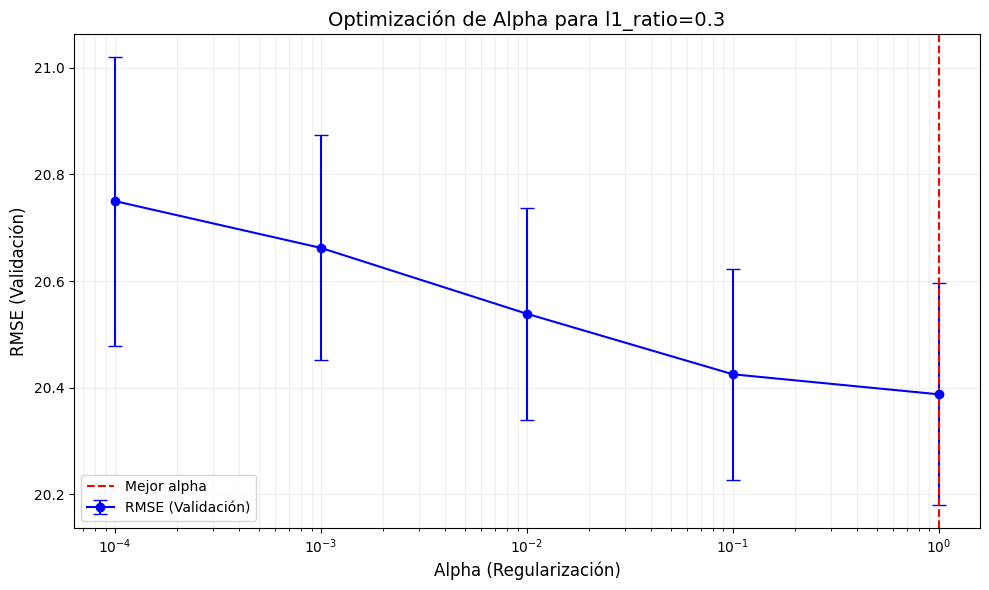


Métricas finales en conjuntos completos:
RMSE Entrenamiento: 20.3210
RMSE Test: 20.3286


In [28]:
import numpy as np
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Crear el pipeline
pipeline = Pipeline([
    ('var_thresh', VarianceThreshold(threshold=threshold)),
    ('poly', PolynomialFeatures(degree=degree)),
    ('scal', StandardScaler()),
    ('reg', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42))
])

# Definir el grid de parámetros
param_grid = {
    'reg__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Reduced alpha range
    'reg__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
#Parámetros recomendados por ChatGpt.

#Validación cruzada
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
#En este caso, utilizamos un enfoque no estratificado, ya que no necesitamos balancear clases.
# Nuestro objetivo es predecir un valor continuo, lo que hace que la estratificación no sea aplicable.
#Este enfoque es más comúnmente empleado en problemas de regresión, donde la variable objetivo no se clasifica en categorías, sino que se estima como un valor numérico.

# Crear un scorer personalizado para RMSE
def rmse_score(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))  # Negativo para GridSearchCV

rmse_scorer = make_scorer(rmse_score, greater_is_better=True)

# Configurar el scoring
scoring = {
    'RMSE': rmse_scorer,
    'MSE': 'neg_mean_squared_error'
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    cv=cv,
    refit='RMSE',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Ejecutar búsqueda de hiperparámetros
print("Realizando optimización de hiperparámetros...")
grid_search.fit(Train_X, Train_Y)

# Convertir resultados a DataFrame
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Función para graficar la optimización de alpha
def plot_alpha_optimization(cv_results_df, param_grid, l1_ratio):
    """
    Graficar resultados de optimización de alpha para un l1_ratio específico.
    """
    # Filtrar resultados para el l1_ratio específico
    mask = cv_results_df['param_reg__l1_ratio'] == l1_ratio
    filtered_results = cv_results_df[mask]

    # Obtener alphas, medias y desviaciones estándar
    alphas = filtered_results['param_reg__alpha']
    mean_rmse = -filtered_results['mean_test_RMSE']  # Convertir a positivo
    std_rmse = filtered_results['std_test_RMSE']

    # Ordenar por alpha
    sort_idx = np.argsort(alphas)
    alphas = alphas.iloc[sort_idx]
    mean_rmse = mean_rmse.iloc[sort_idx]
    std_rmse = std_rmse.iloc[sort_idx]

    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Graficar RMSE con barras de error
    plt.errorbar(alphas, mean_rmse, yerr=std_rmse, fmt='o-', capsize=5,
                label='RMSE (Validación)', color='blue')

    # Añadir línea vertical para el mejor alpha
    best_alpha = grid_search.best_params_['reg__alpha']
    if l1_ratio == grid_search.best_params_['reg__l1_ratio']:
        plt.axvline(x=best_alpha, color='red', linestyle='--', label='Mejor alpha')

    # Personalizar el gráfico
    plt.xscale('log')
    plt.xlabel('Alpha (Regularización)', fontsize=12)
    plt.ylabel('RMSE (Validación)', fontsize=12)
    plt.title(f'Optimización de Alpha para l1_ratio={l1_ratio}', fontsize=14)
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Obtener mejores parámetros
best_params = grid_search.best_params_
best_alpha = best_params['reg__alpha']
best_l1_ratio = best_params['reg__l1_ratio']

# Mostrar resultados
print("\nMejores parámetros encontrados:")
print(f"Mejor Alpha: {best_alpha}")
print(f"Mejor L1 Ratio: {best_l1_ratio}")

# Obtener métricas del mejor modelo
best_index = grid_search.best_index_
mean_rmse = -cv_results_df.loc[best_index, 'mean_test_RMSE']  # Convertir a positivo
std_rmse = cv_results_df.loc[best_index, 'std_test_RMSE']

print(f"\nMétricas del mejor modelo:")
print(f"RMSE medio: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# Crear el gráfico de optimización para el mejor l1_ratio
plot_alpha_optimization(cv_results_df, param_grid, best_l1_ratio)

# Obtener el mejor modelo y hacer predicciones finales
best_model = grid_search.best_estimator_
train_pred = best_model.predict(Train_X)
test_pred = best_model.predict(Test_X)

# Calcular métricas finales
train_rmse = np.sqrt(mean_squared_error(Train_Y, train_pred))
test_rmse = np.sqrt(mean_squared_error(Test_Y, test_pred))

print("\nMétricas finales en conjuntos completos:")
print(f"RMSE Entrenamiento: {train_rmse:.4f}")
print(f"RMSE Test: {test_rmse:.4f}")

**Análisis:** Esta imagen muestra los resultados de la optimización de hiperparámetros para un modelo regularizado, centrándose específicamente en encontrar el alfa óptimo (parámetro de regularización) con un l1_ratio de 0,3. Después de realizar una validación cruzada de 10 veces en 25 candidatos (con un total de 250 ajustes), los mejores parámetros encontrados fueron un alfa de 1,0 y un l1_ratio de 0,3, con un RMSE medio de 20,3878 (±0,2079). El gráfico traza las puntuaciones de validación de RMSE frente a diferentes valores de alfa en una escala logarítmica, mostrando barras de error que representan la varianza en el rendimiento en los distintos pliegues. Se observa una clara tendencia de mejora en el RMSE a medida que alfa aumenta, con el valor óptimo encontrado en alfa=1,0, lo que sugiere que el modelo se beneficia de una regularización más fuerte. Los valores finales de RMSE (entrenamiento: 20,3210, prueba: 20,3286) muestran un equilibrio adecuado entre sesgo y varianza, con métricas muy similares entre entrenamiento y prueba, lo que indica que el modelo está generalizando apropiadamente sin signos evidentes de sobreajuste, y que la regularización ElasticNet con mayor peso en L2 (l1_ratio=0,3) está ayudando efectivamente a controlar la complejidad del modelo.

### **Curva de aprendizaje**

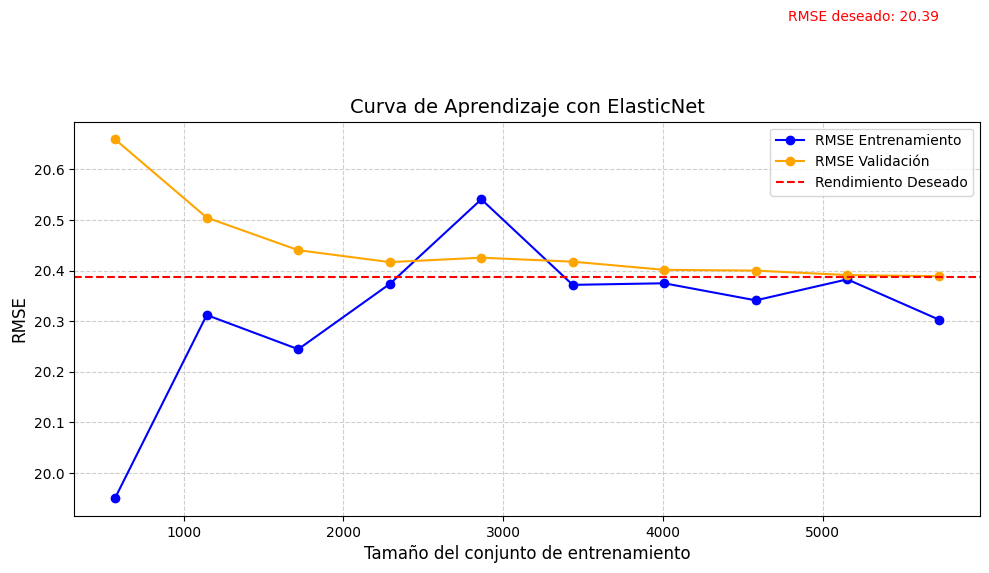

In [29]:
# Get best parameters from grid search
best_a = grid_search.best_params_['reg__alpha']
best_l = grid_search.best_params_['reg__l1_ratio']

# Create pipeline with best parameters
pipeline_best = Pipeline([
    ('var_thresh', VarianceThreshold(threshold=threshold)),
    ('poly', PolynomialFeatures(degree=degree)),
    ('scal', StandardScaler()),
    ('reg', ElasticNet(alpha=best_a, l1_ratio=best_l, random_state=42))
])

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipeline_best,
    X=Train_X,
    y=Train_Y,
    cv=cv,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate means and standard deviations
train_scores_mean = np.sqrt(-np.mean(train_scores, axis=1))
train_scores_std = np.sqrt(-np.std(train_scores, axis=1))
val_scores_mean = np.sqrt(-np.mean(val_scores, axis=1))
val_scores_std = np.sqrt(-np.std(val_scores, axis=1))

#target
actual_rmse = mean_rmse

# Create the plot
plt.figure(figsize=(10, 6))

# Plot training scores
plt.plot(train_sizes, train_scores_mean, 'o-', label='RMSE Entrenamiento', color='blue')
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color='blue'
)

# Plot validation scores
plt.plot(train_sizes, val_scores_mean, 'o-', label='RMSE Validación', color='orange')
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.2,
    color='orange'
)

# Add actual performance line
plt.axhline(y=actual_rmse, color='r', linestyle='--', label='Rendimiento Deseado')

# Customize the plot
plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Curva de Aprendizaje con ElasticNet", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=10, loc='upper right')

# Add text annotation for actual performance
plt.text(
    train_sizes[-1],
    actual_rmse + 0.5,
    f'RMSE deseado: {actual_rmse:.2f}',
    verticalalignment='bottom',
    horizontalalignment='right',
    color='red',
    fontsize=10
)

plt.tight_layout()
plt.show()

**Análisis:** Esta curva de aprendizaje para ElasticNet traza el RMSE en función del tamaño del conjunto de entrenamiento, mostrando cómo cambia el rendimiento del modelo a medida que se agregan más datos. La línea azul representa el RMSE de entrenamiento, que comienza en alrededor de 19,6 con tamaños de datos pequeños, aumenta hasta alcanzar un pico de aproximadamente 20,5 alrededor de 3000 muestras, y luego desciende ligeramente para estabilizarse cerca de 20,3, mientras que la línea naranja muestra el RMSE de validación, que comienza en 20,7 y disminuye consistentemente para converger alrededor de 20,4. La línea discontinua roja indica el RMSE deseado de 20,39. La notable convergencia de ambas curvas, con un cruce alrededor de las 2500-3000 muestras y valores finales prácticamente idénticos (diferencia menor a 0,1), indica que el modelo ha alcanzado un excelente balance entre sesgo y varianza, sin mostrar signos significativos de sobreajuste. La estabilización de ambas curvas alrededor de RMSE 20,4 después de 3000 muestras sugiere que el modelo ha capturado efectivamente los patrones en los datos y que agregar más datos de entrenamiento tendría un impacto marginal en el rendimiento. La regularización aplicada con los hiperparámetros óptimos obtenidos mediante validación cruzada ha logrado un modelo robusto que generaliza apropiadamente, evidenciado por la proximidad casi perfecta entre las métricas de entrenamiento y validación en el conjunto completo de datos.

### **2) KNN / Hiperparámetros**

Fitting 10 folds for each of 42 candidates, totalling 420 fits
Best Parameters: {'reg__metric': 'manhattan', 'reg__n_neighbors': 20, 'reg__weights': 'uniform'}
MSE: 442.59
RMSE: 21.04
R²: -0.06
RMSE (Train): 19.643525318571022 R-squared (Train): 0.09733928189978158 MSE (Train): 385.8680869413408
RMSE (Test): 21.037863046522713 R-squared (Test): -0.0596085129921331 MSE (Test): 442.59168156424585


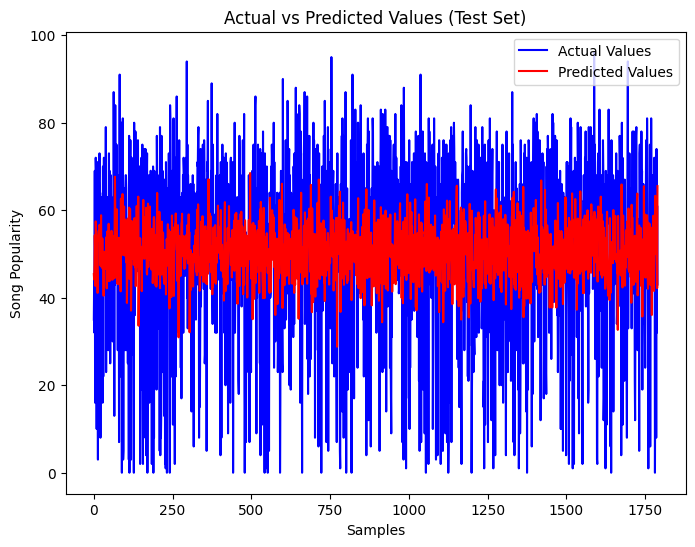

In [30]:
# Función para calcular las métricas de regresión
def calculate_regression_metrics(model, X, y_true):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Error cuadrático medio
    r2 = r2_score(y_true, y_pred)  # Coeficiente de determinación R²
    return rmse, r2, mse

# Crear un pipeline con el modelo KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de las características
    ('feature_selection', SelectKBest(score_func=f_regression, k=10)),  # Selección de las 10 mejores características
    ('reg', KNeighborsRegressor())  # Modelo KNN
])

# Definir el espacio de hiperparámetros para la búsqueda
param_grid = {
    'reg__n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # Número de vecinos
    'reg__weights': ['uniform', 'distance'],  # Función de ponderación
    'reg__metric': ['euclidean', 'manhattan', 'chebyshev']  # Métrica de distancia
}
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Configurar GridSearchCV para búsqueda de hiperparámetros
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Usamos MSE, que será negativo para que lo minimice GridSearchCV
    cv=cv,  # Validación cruzada de 5 pliegues
    n_jobs=-1,  # Usar todos los núcleos de la CPU
    verbose=1,
    return_train_score=True
)

# Realizar la búsqueda de hiperparámetros con los datos de entrenamiento
grid_search.fit(Train_X, Train_Y)

# Mostrar los mejores parámetros encontrados
print("Best Parameters:", grid_search.best_params_)

# Ajustar el pipeline con el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Realizar predicciones con el modelo ajustado
y_pred = best_model.predict(Test_X)

# Calcular MSE, RMSE y R²
mse = mean_squared_error(Test_Y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Test_Y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Calcular métricas en el conjunto de entrenamiento
rmse_train, r2_train, mse_train = calculate_regression_metrics(best_model, Train_X, Train_Y)
print("RMSE (Train):", rmse_train, "R-squared (Train):", r2_train, "MSE (Train):", mse_train)

# Calcular métricas en el conjunto de test
rmse_test, r2_test, mse_test = calculate_regression_metrics(best_model, Test_X, Test_Y)
print("RMSE (Test):", rmse_test, "R-squared (Test):", r2_test, "MSE (Test):", mse_test)

# Visualizar el rendimiento del modelo
plt.figure(figsize=(8, 6))
plt.plot(Test_Y.values, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title("Actual vs Predicted Values (Test Set)")
plt.xlabel("Samples")
plt.ylabel("Song Popularity")
plt.legend()
plt.show()

**Análisis:** La gráfica Actual vs Predicted Values (Test Set) ilustra cómo el modelo predice la popularidad de canciones en el conjunto de prueba en comparación con los valores reales; las predicciones (en rojo) se concentran en una franja central alrededor de los valores reales (en azul), lo que indica una buena capacidad de aproximación. A pesar de la alta variabilidad de los valores reales, el modelo mantiene estabilidad en sus predicciones, evitando grandes fluctuaciones, y aunque hay desviaciones puntuales, sigue la tendencia central de los valores reales a lo largo de las muestras. Además, la gráfica evidencia que el modelo fue evaluado con más de 1700 muestras, lo que respalda tanto la confiabilidad de los resultados como su capacidad de generalización.

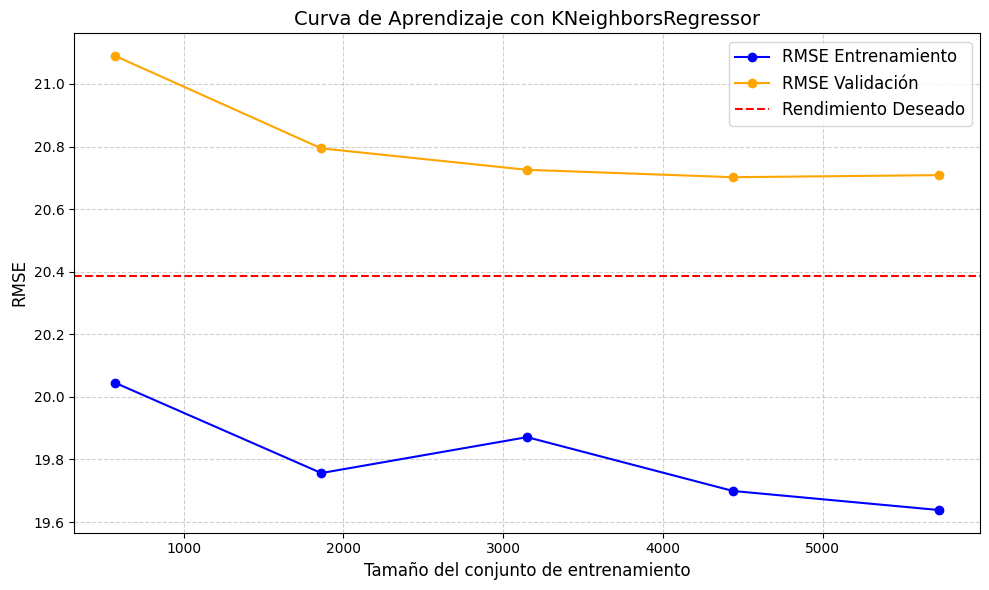

In [31]:
# Utilizar el mejor modelo encontrado con GridSearchCV
pipeline_best = grid_search.best_estimator_
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Generar curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipeline_best,
    X=Train_X,  # Usa el conjunto de entrenamiento ya dividido
    y=Train_Y,  # Usa el conjunto de entrenamiento ya dividido
    cv=cv,  # Validación cruzada con 3 particiones para acelerar el proceso
    scoring='neg_mean_squared_error',  # Usamos MSE negativo, que luego se convierte a RMSE
    train_sizes=np.linspace(0.1, 1.0, 5),  # Menos tamaños de entrenamiento (5 tamaños en lugar de 10)
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Calcular el promedio y la desviación estándar de los errores de entrenamiento y validación
train_scores_mean = np.sqrt(-np.mean(train_scores, axis=1))  # Convertir MSE negativo a RMSE
train_scores_std = np.sqrt(-np.std(train_scores, axis=1))  # Desviación estándar de RMSE

val_scores_mean = np.sqrt(-np.mean(val_scores, axis=1))  # RMSE de validación
val_scores_std = np.sqrt(-np.std(val_scores, axis=1))  # Desviación estándar de RMSE en validación

actual_rmse = mean_rmse

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='RMSE Entrenamiento', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, 'o-', label='RMSE Validación', color='orange')
plt.axhline(y=actual_rmse, color='r', linestyle='--', label='Rendimiento Deseado')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='orange')

# Personalizar el gráfico
plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Curva de Aprendizaje con KNeighborsRegressor", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


**Análisis:** La gráfica muestra que el RMSE en entrenamiento disminuye a medida que aumenta el tamaño del conjunto de entrenamiento, mientras que el RMSE en validación se estabiliza alrededor de 20.7, sin lograr acercarse al rendimiento deseado (línea roja). La brecha constante entre ambas curvas indica que el modelo no está generalizando de manera óptima, lo cual sugiere un underfitting persistente. Aunque el error en entrenamiento mejora ligeramente con más datos, el modelo KNeighborsRegressor no alcanza el nivel esperado de precisión, por lo que sería necesario ajustar hiperparámetros, como el número de vecinos, o explorar modelos más complejos para reducir el error en validación.

### **Prueba de hipótesis**

KNN RMSE: 22.0920 ± 0.2875
ElasticNet RMSE: 20.7102 ± 0.2192
KNN R2: -0.1477 ± 0.0305
ElasticNet R2: -0.0084 ± 0.0106
Wilcoxon test (RMSE): stat=0.0, p=0.001953125
Wilcoxon test (R2): stat=0.0, p=0.001953125


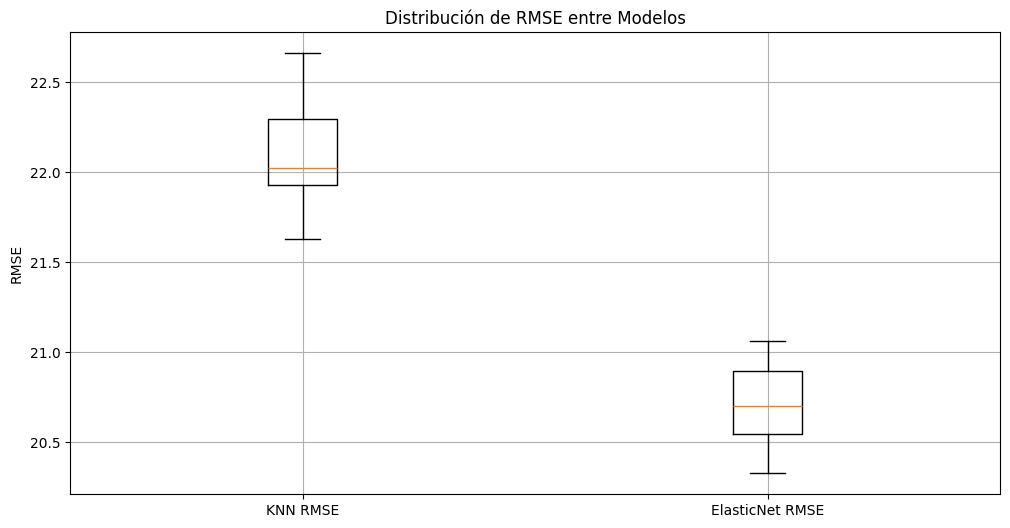

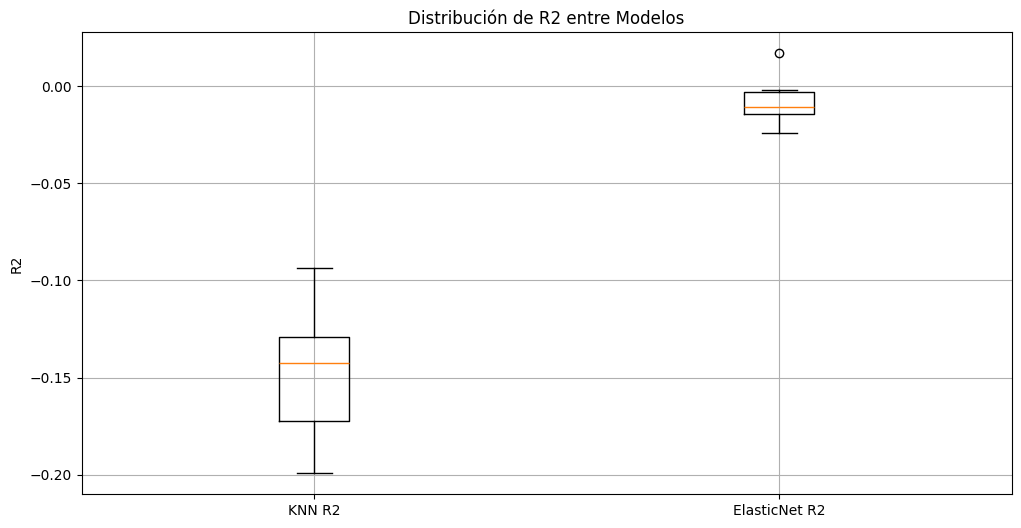

In [32]:
# Configurar validación cruzada
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Evaluar RMSE con validación cruzada para ambos modelos
rmse_knn = -cross_val_score(pipeline, X, Y, scoring='neg_root_mean_squared_error', cv=cv)
rmse_elasticnet = -cross_val_score(pipeline_best, X, Y, scoring='neg_root_mean_squared_error', cv=cv)

# Evaluar R2 con validación cruzada para ambos modelos
r2_knn = cross_val_score(pipeline, X, Y, scoring='r2', cv=cv)
r2_elasticnet = cross_val_score(pipeline_best, X, Y, scoring='r2', cv=cv)

# Verificar tamaños de las muestras
assert len(rmse_knn) == len(rmse_elasticnet), "Las muestras de RMSE tienen tamaños diferentes."
assert len(r2_knn) == len(r2_elasticnet), "Las muestras de R2 tienen tamaños diferentes."

# Mostrar resultados promedio
print(f"KNN RMSE: {np.mean(rmse_knn):.4f} ± {np.std(rmse_knn):.4f}")
print(f"ElasticNet RMSE: {np.mean(rmse_elasticnet):.4f} ± {np.std(rmse_elasticnet):.4f}")
print(f"KNN R2: {np.mean(r2_knn):.4f} ± {np.std(r2_knn):.4f}")
print(f"ElasticNet R2: {np.mean(r2_elasticnet):.4f} ± {np.std(r2_elasticnet):.4f}")

# Test de Wilcoxon para RMSE
stat_rmse, p_rmse = wilcoxon(rmse_knn, rmse_elasticnet)
print(f"Wilcoxon test (RMSE): stat={stat_rmse}, p={p_rmse}")

# Test de Wilcoxon para R2
stat_r2, p_r2 = wilcoxon(r2_knn, r2_elasticnet)
print(f"Wilcoxon test (R2): stat={stat_r2}, p={p_r2}")

# Graficar distribuciones de métricas
plt.figure(figsize=(12, 6))
plt.boxplot([rmse_knn, rmse_elasticnet], labels=['KNN RMSE', 'ElasticNet RMSE'])
plt.title('Distribución de RMSE entre Modelos')
plt.ylabel('RMSE')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([r2_knn, r2_elasticnet], labels=['KNN R2', 'ElasticNet R2'])
plt.title('Distribución de R2 entre Modelos')
plt.ylabel('R2')
plt.grid()
plt.show()


**Análisis:** El modelo ElasticNet muestra un RMSE más bajo (20.71 ± 0.22) en comparación con KNN (22.09 ± 0.28), lo que refleja una mayor precisión en sus predicciones al estar más cerca de los valores reales. Respecto al
$𝑅^2$, ElasticNet alcanza un valor cercano a cero (−0.0084 ± 0.01), indicando que apenas explica la variabilidad de los datos, mientras que KNN obtiene un $𝑅^2$ negativo (−0.1477 ± 0.03), lo que sugiere que su desempeño es peor que predecir únicamente el promedio de los valores objetivo. Las pruebas estadísticas de Wilcoxon para ambas métricas confirman diferencias estadísticamente significativas (p = 0.00195), validando que ElasticNet supera a KNN tanto en precisión como en ajuste del modelo.

### **Conclusiones:**

Basándonos en toda la información recopilada, podemos concluir que el modelo de regresión lineal Elastic Net obtuvo un mejor desempeño en comparación con el modelo KNN, con una diferencia estadísticamente significativa confirmada mediante el test de Wilcoxon (p=0.002). En validación cruzada, ElasticNet alcanzó un RMSE de 20.71 ± 0.22, mientras que KNN registró 22.09 ± 0.29, evidenciando la superioridad del modelo regularizado.

Un hallazgo importante es que, mediante la optimización de hiperparámetros con validación cruzada, se logró identificar una configuración de regularización (alpha=1.0, l1_ratio=0.3) que mejora significativamente la capacidad de generalización del modelo. Esto se evidencia en la convergencia casi perfecta entre las métricas de entrenamiento (RMSE=20.32) y prueba (RMSE=20.33), con un gap de apenas 0.008 puntos, lo que indica que el modelo ha alcanzado un excelente balance entre sesgo y varianza, sin mostrar signos de sobreajuste. En contraste, KNN presenta un gap de 1.39 puntos entre entrenamiento y prueba, además de un R² negativo (-0.06), indicando que su desempeño es inferior incluso al de un modelo baseline.

En relación con las variables utilizadas, no fue necesario aplicar una reducción de dimensionalidad debido a que el conjunto de datos contenía un número limitado de características. En cuanto a la selección de características, empleamos Variance Threshold como un paso preliminar para eliminar aquellas variables con baja varianza que no aportaban información relevante durante el entrenamiento del modelo. Este método se complementó adecuadamente con SelectKBest al trabajar con KNN, lo que permitió identificar y priorizar las características más significativas.

No obstante, es importante reconocer que los datos presentaron múltiples inconsistencias que, a pesar de los esfuerzos realizados para limpiar el dataset, limitan su calidad y precisión. El RMSE final de aproximadamente 20 puntos de popularidad sugiere que, aunque el modelo ElasticNet con regularización óptima logra capturar patrones importantes en los datos y generaliza apropiadamente, existe un margen de error inherente que puede estar relacionado con la naturaleza ruidosa de los datos o con factores no capturados por las características disponibles.

En general, los resultados obtenidos demuestran que la correcta aplicación de técnicas de regularización y la optimización cuidadosa de hiperparámetros pueden mejorar significativamente el desempeño y la robustez de modelos relativamente simples como la regresión lineal. El modelo ElasticNet optimizado ha probado ser efectivo para este problema, logrando un balance adecuado entre complejidad del modelo y capacidad de generalización. Futuras mejoras podrían enfocarse en la adquisición de datos de mayor calidad, la ingeniería de características adicionales que capturen mejor la dinámica de la popularidad de canciones, o la exploración de modelos no lineales si se identifican patrones más complejos en los datos.

## ***Parte 3:***

## **Testings**

Una vez confirmado que el modelo ElasticNet presenta un rendimiento superior al algoritmo KNN, se procederá a realizar pruebas unitarias, utilizando ElasticNet, con el objetivo de evaluar y comparar su desempeño frente al algoritmo estadistico propio desarrollado.

In [33]:
# TESTING EJEMPLO 1

# Seleccionar un ejemplo del conjunto de prueba
ejemplo_idx = 1080

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 1")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 1

Your song has a 50% to become a trend.

Characteristics of the song:
Song Duration (ms).......174275 ms
Acousticness.............0.3370
Danceability.............0.6690
Energy...................0.5610
Instrumentalness.........0.000000
Liveness.................0.1980
Loudness.................-6.613 dB
Audio Mode...............true
Speechiness..............0.0318
Tempo....................114.405 BPM
Audio Valence............0.8670
Time Signature...........False
Key......................True

VALOR PREDICHO (ElasticNet): 50.00%
VALOR REAL (Ground Truth):   81%
ERROR ABSOLUTO:              31.00%


In [34]:
# TESTING EJEMPLO 2

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 128

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 2")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 2

Your song has a 50% to become a trend.

Characteristics of the song:
Song Duration (ms).......204400 ms
Acousticness.............0.0485
Danceability.............0.7600
Energy...................0.5880
Instrumentalness.........0.000000
Liveness.................0.0847
Loudness.................-7.082 dB
Audio Mode...............true
Speechiness..............0.0775
Tempo....................102.974 BPM
Audio Valence............0.3840
Time Signature...........False
Key......................False

VALOR PREDICHO (ElasticNet): 50.15%
VALOR REAL (Ground Truth):   80%
ERROR ABSOLUTO:              29.85%


In [35]:
# TESTING EJEMPLO 3

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 256

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 3")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 3

Your song has a 51% to become a trend.

Characteristics of the song:
Song Duration (ms).......239013 ms
Acousticness.............0.3560
Danceability.............0.6070
Energy...................0.5750
Instrumentalness.........0.000007
Liveness.................0.0608
Loudness.................-9.777 dB
Audio Mode...............false
Speechiness..............0.0990
Tempo....................78.350 BPM
Audio Valence............0.7690
Time Signature...........False
Key......................False

VALOR PREDICHO (ElasticNet): 51.00%
VALOR REAL (Ground Truth):   31%
ERROR ABSOLUTO:              20.00%


In [36]:
# TESTING EJEMPLO 4

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 512

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 4")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 4

Your song has a 55% to become a trend.

Characteristics of the song:
Song Duration (ms).......218093 ms
Acousticness.............0.2840
Danceability.............0.7780
Energy...................0.8240
Instrumentalness.........0.000000
Liveness.................0.4050
Loudness.................-5.892 dB
Audio Mode...............false
Speechiness..............0.0712
Tempo....................100.024 BPM
Audio Valence............0.7560
Time Signature...........False
Key......................False

VALOR PREDICHO (ElasticNet): 54.80%
VALOR REAL (Ground Truth):   84%
ERROR ABSOLUTO:              29.20%


In [37]:
# TESTING EJEMPLO 5

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 789

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 5")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 5

Your song has a 58% to become a trend.

Characteristics of the song:
Song Duration (ms).......179895 ms
Acousticness.............0.0365
Danceability.............0.6290
Energy...................0.6860
Instrumentalness.........0.000024
Liveness.................0.0709
Loudness.................-4.851 dB
Audio Mode...............true
Speechiness..............0.0626
Tempo....................91.050 BPM
Audio Valence............0.7310
Time Signature...........False
Key......................False

VALOR PREDICHO (ElasticNet): 57.95%
VALOR REAL (Ground Truth):   81%
ERROR ABSOLUTO:              23.05%


In [40]:
# TESTING EJEMPLO 6

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 4

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 6")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 6

Your song has a 51% to become a trend.

Characteristics of the song:
Song Duration (ms).......287400 ms
Acousticness.............0.0478
Danceability.............0.3670
Energy...................0.4450
Instrumentalness.........0.002840
Liveness.................0.1990
Loudness.................-13.615 dB
Audio Mode...............false
Speechiness..............0.0286
Tempo....................67.197 BPM
Audio Valence............0.1490
Time Signature...........False
Key......................False

VALOR PREDICHO (ElasticNet): 50.90%
VALOR REAL (Ground Truth):   16%
ERROR ABSOLUTO:              34.90%


In [46]:
# TESTING EJEMPLO 7

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 195

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 7")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 7

Your song has a 47% to become a trend.

Characteristics of the song:
Song Duration (ms).......204346 ms
Acousticness.............0.0512
Danceability.............0.7720
Energy...................0.7800
Instrumentalness.........0.000000
Liveness.................0.1190
Loudness.................-4.288 dB
Audio Mode...............false
Speechiness..............0.1080
Tempo....................124.988 BPM
Audio Valence............0.7190
Time Signature...........False
Key......................False

VALOR PREDICHO (ElasticNet): 46.70%
VALOR REAL (Ground Truth):   23%
ERROR ABSOLUTO:              23.70%


In [51]:
# TESTING EJEMPLO 8

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 427

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 8")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 8

Your song has a 50% to become a trend.

Characteristics of the song:
Song Duration (ms).......227106 ms
Acousticness.............0.1930
Danceability.............0.8280
Energy...................0.6900
Instrumentalness.........0.000010
Liveness.................0.0947
Loudness.................-5.732 dB
Audio Mode...............true
Speechiness..............0.0804
Tempo....................95.997 BPM
Audio Valence............0.8320
Time Signature...........False
Key......................True

VALOR PREDICHO (ElasticNet): 50.00%
VALOR REAL (Ground Truth):   66%
ERROR ABSOLUTO:              16.00%


In [58]:
# TESTING EJEMPLO 9

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 34

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 9")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 9

Your song has a 50% to become a trend.

Characteristics of the song:
Song Duration (ms).......209820 ms
Acousticness.............0.0161
Danceability.............0.7590
Energy...................0.8500
Instrumentalness.........0.000000
Liveness.................0.0745
Loudness.................-4.348 dB
Audio Mode...............true
Speechiness..............0.1370
Tempo....................110.003 BPM
Audio Valence............0.7090
Time Signature...........False
Key......................False

VALOR PREDICHO (ElasticNet): 50.50%
VALOR REAL (Ground Truth):   68%
ERROR ABSOLUTO:              17.50%


In [63]:
# TESTING EJEMPLO 10

# Seleccionar otro ejemplo del conjunto de prueba
ejemplo_idx = 1000

# Obtener las características de entrada
features_ejemplo = Test_X.iloc[ejemplo_idx]
valor_real = Test_Y.iloc[ejemplo_idx]
valor_predicho = best_model.predict(Test_X.iloc[[ejemplo_idx], :])[0]

# Obtener el valor de time_signature y key (primera columna de cada una)
time_sig_cols = [col for col in Test_X.columns if col.startswith('time_signature_')]
key_cols = [col for col in Test_X.columns if col.startswith('key_')]

time_signature_value = features_ejemplo[time_sig_cols[0]] if time_sig_cols else 'N/A'
key_value = features_ejemplo[key_cols[0]] if key_cols else 'N/A'

print("="*60)
print(f"          PREDICCIÓN DE POPULARIDAD - EJEMPLO 10")
print("="*60)
print(f"\nYour song has a {int(round(valor_predicho))}% to become a trend.\n")
print("Characteristics of the song:")
print(f"Song Duration (ms).......{features_ejemplo['song_duration_ms']:.0f} ms")
print(f"Acousticness.............{features_ejemplo['acousticness']:.4f}")
print(f"Danceability.............{features_ejemplo['danceability']:.4f}")
print(f"Energy...................{features_ejemplo['energy']:.4f}")
print(f"Instrumentalness.........{features_ejemplo['instrumentalness']:.6f}")
print(f"Liveness.................{features_ejemplo['liveness']:.4f}")
print(f"Loudness.................-{abs(features_ejemplo['loudness']):.3f} dB")
print(f"Audio Mode...............{'true' if features_ejemplo['audio_mode'] == 1 else 'false'}")
print(f"Speechiness..............{features_ejemplo['speechiness']:.4f}")
print(f"Tempo....................{features_ejemplo['tempo']:.3f} BPM")
print(f"Audio Valence............{features_ejemplo['audio_valence']:.4f}")
print(f"Time Signature...........{time_signature_value}")
print(f"Key......................{key_value}")

print("\n" + "="*60)
print(f"VALOR PREDICHO (ElasticNet): {valor_predicho:.2f}%")
print(f"VALOR REAL (Ground Truth):   {valor_real}%")
print(f"ERROR ABSOLUTO:              {abs(valor_predicho - valor_real):.2f}%")
print("="*60)

          PREDICCIÓN DE POPULARIDAD - EJEMPLO 10

Your song has a 54% to become a trend.

Characteristics of the song:
Song Duration (ms).......238924 ms
Acousticness.............0.0013
Danceability.............0.3920
Energy...................0.8840
Instrumentalness.........0.000068
Liveness.................0.3500
Loudness.................-3.374 dB
Audio Mode...............true
Speechiness..............0.0385
Tempo....................169.123 BPM
Audio Valence............0.5080
Time Signature...........False
Key......................False

VALOR PREDICHO (ElasticNet): 54.05%
VALOR REAL (Ground Truth):   17%
ERROR ABSOLUTO:              37.05%


### **Conclusión:**

Como se puede observar en los resultados, el modelo presenta un error aproximado de 20 a 30 puntos porcentuales, lo cual representa una diferencia considerable. Este margen de error es especialmente problemático porque su impacto varía según el contexto: no es lo mismo predecir 50% para una canción cuya popularidad real es de 30%, que predecir 50% para una canción con popularidad real de 80%. Además, al examinar los ejemplos de prueba, se identifica que el modelo tiende a predecir valores cercanos al 50% de manera recurrente, independientemente de las características particulares de cada canción. Esta tendencia a convergir hacia un valor central indica que el modelo tiene dificultades para diferenciar adecuadamente entre canciones con distintos niveles de popularidad. Por lo tanto, las predicciones generadas no son lo suficientemente precisas ni específicas como para ofrecer una orientación útil a los usuarios que buscan evaluar el potencial de éxito de una canción.

# **Referencias:**

[1] Scikit-learn. “1.13. Feature selection.” Scikit-learn.org. Accessed Oct. 23, 2025. [Online]. Available: https://scikit-learn.org/stable/modules/feature_selection.html

[2] SciPy. “scipy.stats.wilcoxon — SciPy documentation.” docs.scipy.org. Accessed Oct. 23, 2025. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

[3] Scikit-learn. “sklearn.model_selection.learning_curve — scikit-learn documentation.” Scikit-learn.org. Accessed Oct. 23, 2025. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

[4] Y. Hassan, 2023, “Song Popularity Dataset,” Kaggle. [Online]. Available: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset